![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='PURPLE'>Ciência dos Dados na Prática</font>

# <font color='GREY'> KNN: Avaliação de Condições de Saúde Ortopédica de Pacientes</font>
https://www.kaggle.com/uciml/biomechanical-features-of-orthopedic-patients


https://www.kaggle.com/jamiemorales/knn-biomech-patients-condition

![alt text](https://img.myloview.com.br/fotomurais/3d-mostrou-uma-ilustracao-medicamente-precisa-da-coluna-vertebral-humana-400-102492167.jpg)

#1° Problema de Negócio 
Prever as condições Ortopédicas: Precisamos classificar os pacientes em uma das três categorias: 
* Normais (100 pacientes) 
* Hérnia de disco (60 pacientes)  
* Espondilolistese (150 pacientes). Distúrbio da coluna em que um osso (vértebra) desliza para frente sobre o osso abaixo dele.
Os fatores de risco de espondilolistese incluem esportes que exercem pressão sobre os ossos na parte inferior das costas, como ginástica e futebol.

Cada paciente é representado no conjunto de dados por **seis atributos biomecânicos** derivados da forma e orientação da pelve e da coluna lombar.

**Atributos** (variáveis de entrada)

1. incidência pélvica
2. inclinação pélvica
3. ângulo lordose lombar
4.inclinação sacral
5. raio pélvico
6. grau de espondilolistese

In [31]:
# Set-up libraries
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


#2° Análise Exploratória dos Dados

In [41]:
# Read-in data
df = pd.read_csv('column_3C_weka.csv')

In [42]:
# Look at some details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [ ]:
# Look at some records
df.head()

In [ ]:
# Check for missing values
df.isna().sum()

In [45]:
# Check for duplicated
df.duplicated().sum()

0

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


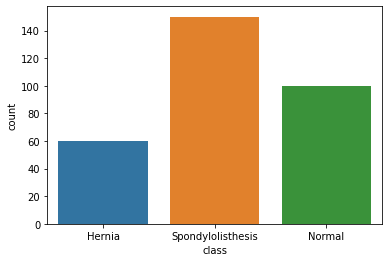

In [48]:
# Look at breakdown of label
df['class'].value_counts()
sns.countplot(df['class'])

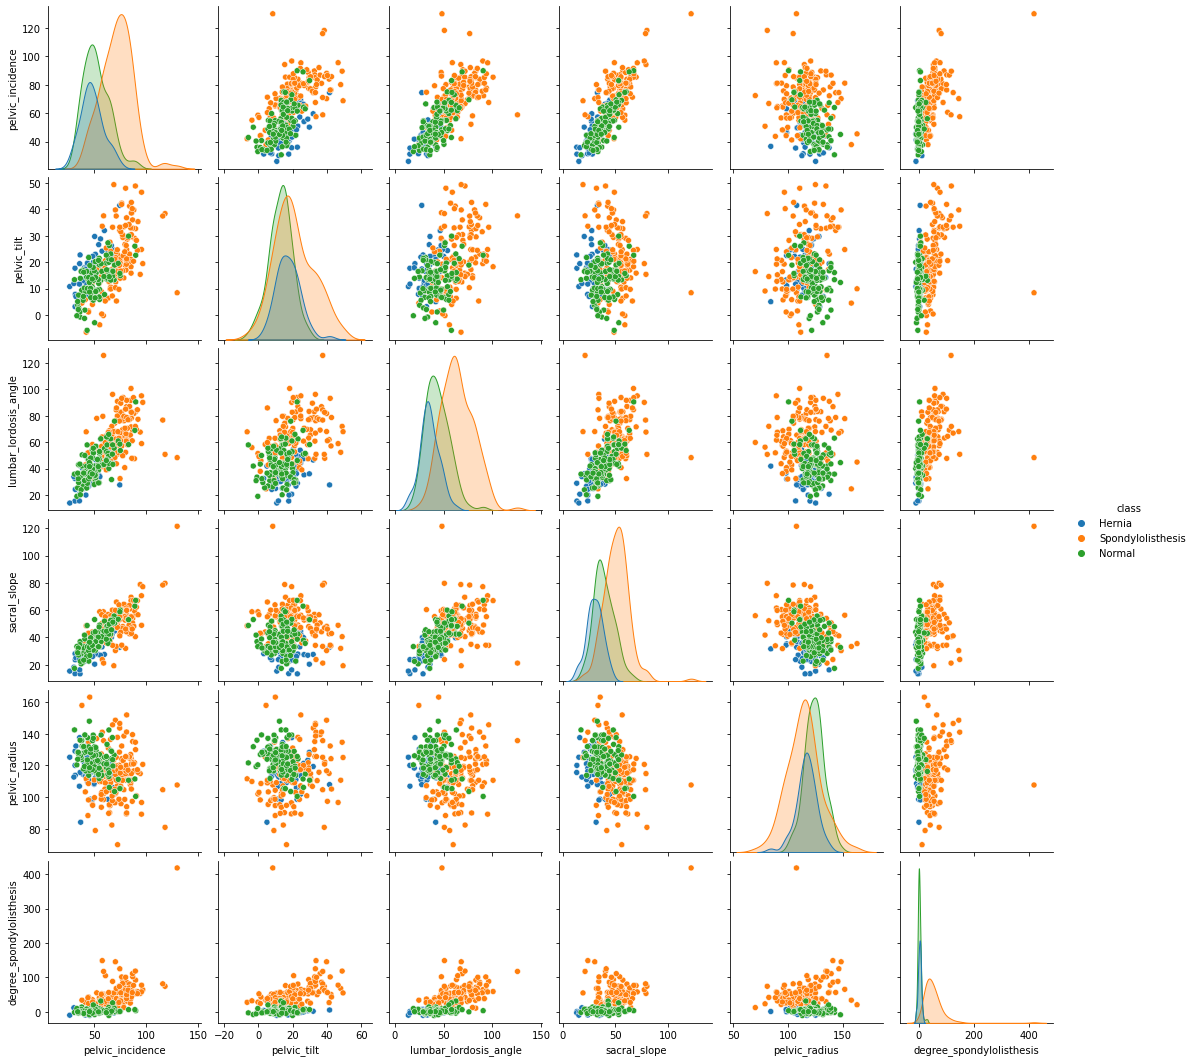

In [50]:
# Explore data visually with multple scatter plots
sns.pairplot(df, hue='class')

In [51]:
# Summarise
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


#3° Pré-Processamento dos Dados

##### Separação das variáveis de Entrada(variáveis explicativas) e de Saída (Target)

In [52]:
X = df.drop('class', axis=1)
y = df['class']

##### Redimensionamento dos dados: Padroniza ou Normaliza

In [67]:
#Normalização
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

#Padronizado
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)


##### Separação em Dados de Treino e Dados de Teste

In [73]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

#4° Máquina Preditiva

In [74]:
# Build model and train data
classifier = KNeighborsClassifier(n_neighbors=3)
knn = classifier.fit(X_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [75]:
# Apply model to validation data
y_predict = knn.predict(X_val)

In [76]:
# Compare actual and predicted values
actual_vs_predict = pd.DataFrame({'Actual: ': y_val,
                     'Prediction: ': y_predict})
actual_vs_predict.head(3)

,Actual:,Prediction:
279,Normal,Normal
102,Spondylolisthesis,Spondylolisthesis
171,Spondylolisthesis,Normal


#5° Avaliação da Máquina Preditiva

In [77]:
# Evaluate model

print('Accuracy: \n', accuracy_score(y_val, y_predict))
#Baseline = 85,48%
#normalizado = 74%
#Padronizado = 82,25%

Accuracy: 
 0.8548387096774194


In [80]:
print('Classification metrics: \n', classification_report(y_val, y_predict))

Classification metrics: 
                    precision    recall  f1-score   support

           Hernia       0.50      0.57      0.53         7
           Normal       0.80      0.76      0.78        21
Spondylolisthesis       0.97      0.97      0.97        34

         accuracy                           0.85        62
        macro avg       0.76      0.77      0.76        62
     weighted avg       0.86      0.85      0.86        62



In [79]:
print('Confusion_matrix: \n', confusion_matrix(y_val, y_predict))

Confusion_matrix: 
 [[ 4  3  0]
 [ 4 16  1]
 [ 0  1 33]]


# Fim

## Valeu!

### #Links - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

### #YouTube - Mais Aulas como essa no YouTube <a href="https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s">https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="380" height="200" src="https://www.youtube.com/embed/c4wDGK9eUyc" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')